# Final Capstone: Twitter Sentiment Alaysis

#### An election for president of the United States happens every four years on the first Tuesday after the first Monday in November. Candidates are elected directly by popular vote.
#### I performed some data exploration and visualization in this notebook using data from Twitter to gather the candidates popularity and the chances for them to win the race. This analysis also provides customer sentiment towards polical party and how to connect with voters.

##### Data Source: Twitter

#### The intended audience of this is any candidate that have decided to run for the election and wanted insights of himself and other candidates. This information can lead the candicate to invest their time and money where it is required.

#### The notebook work flow is as follows:

##### _ Framing the 
##### - Loading dataset to pandas dataframe
##### - Data exploration and cleaning
##### - Insights extraction
##### - Conclusion

### Use Twitter API keys

In [3]:
ACCESS_TOKEN = "2579829499-HkSx8z7ToV0rPouv27z4HwFRFIdJM0f57GUgdzv"
ACCESS_TOKEN_SECRET = "w5LhkcI3FdlZaK7cKFOCR9hRXmqkCDWbl3uPJVAE6n1UL"
CONSUMER_KEY = "kfYddvhVO6vRrn1yNG4N6C6iA"
CONSUMER_SECRET = "Jlj9vj1M3PYJ3I1CVM9ZtYeuZxI1jS8DUWoTzFRY43mGimMWVi"

In [4]:
import sys
print(sys.version)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 19:29:22) [MSC v.1916 32 bit (Intel)]


In [5]:
import twitter_credentials

In [6]:
pwd

'C:\\Thinkful\\Assignments\\Final_Project_2\\FullYoutubeVideo\\Part_1_streaming_tweets'

### Import the necessary libraries and authenticate  for data wrangling below

In [7]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from tweepy import cursor
import numpy as np

 

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
#for tweet in public_tweets:
    #print(tweet.text)

In [ ]:
# Twitter AUthenticator
class TwitterAuthenticator ():
    def  authenticate_twitter_app(self):
        auth = OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)
        auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)
        return auth
        

### Stream the data

In [ ]:
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_authenticator = TwitterAuthenticator()

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwittertListener(fetched_tweets_filename)
        auth = self.twitter_authenticator.authenticate_twitter_app()
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)
        

In [ ]:
from tweepy.streaming import StreamListener
# # # # TWITTER STREAM LISTENER # # # #
class TwittertListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          

    def on_error(self, status):
        print(status)


In [ ]:
if __name__ == '__main__':
 
    # Authenticate using config.py and connect to Twitter Streaming API.
    #hash_tag_list = ["CELSIUSDrink", "@CelsiusOfficial"]
    hash_tag_list = ["Pete Buttigieg","@PeteButtigieg"]
    #fetched_tweets_filename = "tweets.txt"
    fetched_tweets_filename = "tweetPete.json"

    twitter_streamer = TwitterStreamer()
    twitter_streamer.stream_tweets(fetched_tweets_filename, hash_tag_list)
    

### Write the data to JSON file

In [ ]:
# I can't load JSON file bigger than 100MB file into my laptop's memory! 
# start from here and adjust the JSON file for smaller size with Git Bash.

In [10]:
# create dataframe
import pandas as pd
#df= pd.read_json("tweets_1.json", encoding="utf8", lines = True)
df= pd.read_json("tweetPete.json", encoding="utf8", lines = True)
#df = pd.read_json(open("C:\Thinkful\Assignments\Final_Project_2\FullYoutubeVideo\Part_1_streaming_tweets/tweetcel.json", "r", encoding="utf8"),lines=True)

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.shape

(13706, 37)

In [3]:
# df = pd.DataFrame(df)

In [4]:
pwd

'C:\\Thinkful\\Assignments\\Final_Project_2\\FullYoutubeVideo\\Part_1_streaming_tweets'

### Import, explore and clean data.¶


In [5]:
df.head()

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,possibly_sensitive,extended_entities,withheld_in_countries
0,2020-02-09 16:14:51+00:00,1226539969348587526,1226539969348587520,@AdventuresMayor @iamhenrydavisjr @PeteButtigi...,"[49, 140]","<a href=""http://twitter.com/#!/download/ipad"" ...",True,1.226318e+18,1.226318e+18,1.119388e+18,...,en,2020-02-09 16:14:51.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-09 16:14:51+00:00,1226539969658916867,1226539969658916864,RT @iamhenrydavisjr: As a Councilman in #South...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2020-02-09 16:14:51.434,{'created_at': 'Sun Feb 09 00:22:01 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-09 16:14:51+00:00,1226539970703302657,1226539970703302656,RT @Debmoley: “When asked a question Buttigieg...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2020-02-09 16:14:51.683,{'created_at': 'Sun Feb 09 13:32:02 +0000 2020...,1.226494e+18,1.226494e+18,{'created_at': 'Sun Feb 09 13:10:40 +0000 2020...,"{'url': 'https://t.co/puxcBt8DOf', 'expanded':...",NaN,NaN,NaN
3,2020-02-09 16:14:52+00:00,1226539972926279681,1226539972926279680,"RT @CDRosa: In 2008, Barack Obama won nonwhite...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2020-02-09 16:14:52.213,{'created_at': 'Sun Feb 09 05:53:47 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-09 16:14:52+00:00,1226539972850831360,1226539972850831360,RT @MeetThePress: WATCH: @PeteButtigieg respon...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,en,2020-02-09 16:14:52.195,{'created_at': 'Sun Feb 09 14:26:39 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


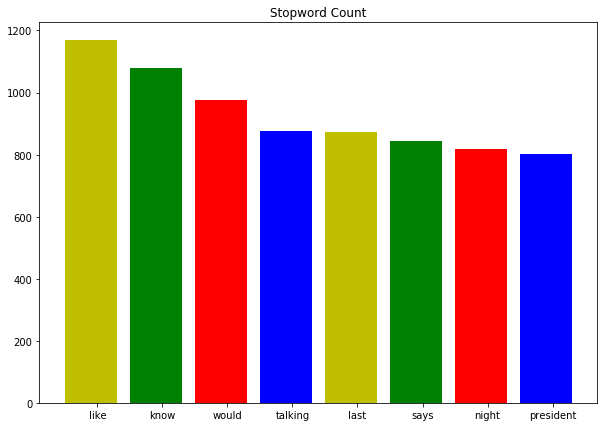

In [151]:
# plot histogram for word count - pre-word clean
# Transforming text to number
from collections import Counter
import numpy as np
# Use NLTK to clean-up the stopwords
import nltk
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))

word_counts=Counter()
for i in range(len(df_wordclean['text'])):
        for word in df_wordclean['text'][i].split(" "):
            if word in sw:
                                            continue
            if word in ('','rt', 'petebuttigieg', 'https', 'pete', 'buttigieg', 'co', 'bernie''berniesanders', 'iamhenrydavisjr','bernie','berniesanders','southbend'):
                continue
            word_counts[word] += 1
            


labels=[]
values=[]
for label, value in list(word_counts.most_common(8)):
    labels.append(label)
    values.append(value)

fig,ax = plt.subplots(figsize = (10,7))
indexes = np.arange(len(labels))
width = 1
plt.title("Stopword Count")
plt.bar(indexes, values, width= 0.8, color = 'ygrb')
plt.xticks(indexes + width * 0.1, labels)
plt.savefig("img/Word_count.png", bbox_inches='tight', pad_inches=2)
plt.show()

In [152]:
print(labels)

['like', 'know', 'would', 'talking', 'last', 'says', 'night', 'president']


In [129]:
print(values)

[1168, 1079, 977, 877, 872, 843, 824, 817]


In [6]:
df.tail()

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,possibly_sensitive,extended_entities,withheld_in_countries
13701,2020-02-09 16:52:08+00:00,1226549352572870657,1226549352572870656,RT @erckmelo: Crowd chants #WallStreetPete whi...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2020-02-09 16:52:08.495,{'created_at': 'Sun Feb 09 03:23:25 +0000 2020...,NaN,NaN,NaN,NaN,0.0,"{'media': [{'id': 1226345749119528960, 'id_str...",NaN
13702,2020-02-09 16:52:08+00:00,1226549352904241153,1226549352904241152,RT @RNCResearch: Pete Buttigieg says if he was...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2020-02-09 16:52:08.574,{'created_at': 'Sat Feb 08 01:58:07 +0000 2020...,NaN,NaN,NaN,NaN,0.0,NaN,NaN
13703,2020-02-09 16:52:08+00:00,1226549352908414984,1226549352908414976,"RT @atensnut: Pete, here is the question you r...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,...,en,2020-02-09 16:52:08.575,{'created_at': 'Sun Feb 09 15:44:46 +0000 2020...,1.225469e+18,1.225469e+18,{'created_at': 'Thu Feb 06 17:18:07 +0000 2020...,"{'url': 'https://t.co/VL8aPF1QzE', 'expanded':...",NaN,NaN,NaN
13704,2020-02-09 16:52:08+00:00,1226549354242150402,1226549354242150400,@samrjw @sommerc @redlionny @PetesAmerica @rea...,"[70, 140]","<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.226503e+18,1.226503e+18,270182274.0,...,en,2020-02-09 16:52:08.893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13705,2020-02-09 16:52:09+00:00,1226549355294818304,1226549355294818304,"RT @davidsirota: In less than a decade, @PeteB...",NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,en,2020-02-09 16:52:09.144,{'created_at': 'Sun Feb 09 15:41:09 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Modeling

In [95]:
# Clean the data and model it

# Removing punctuations
df_wordclean = df.iloc[:,3:4]
df_wordclean.replace("[^a-zA-Z]"," ",regex=True, inplace=True)


In [96]:
df_wordclean.head()

,text
0,AdventuresMayor iamhenrydavisjr PeteButtigi...
1,RT iamhenrydavisjr As a Councilman in South...
2,RT Debmoley When asked a question Buttigieg...
3,RT CDRosa In Barack Obama won nonwhite...
4,RT MeetThePress WATCH PeteButtigieg respon...


In [105]:
print(labels)

('rt  iamhenrydavisjr  as a councilman in  southbend  i know why  petebuttigieg looked like a deer in headlights last night when talking abou ', 'rt  rncresearch  pete buttigieg says if he was president  terrorist leader soleimani would still be alive https   t co xvjmogtiev https   t ', 'rt  aishaismad  pete buttigieg wants mandatory military service for all american citizens  starting in high school  pass it on', 'rt  marklevinshow  buttigieg is also a radical leftist https   t co  kbxf  pmg', 'rt  donaldjtrumpjr  yikes   ', 'rt  maplecocaine  bernie  we can t just  ahem   nibble  at the edges of problems yang  we can t just nibble at the edges lol warren  we can ', 'rt  atensnut  pete  here is the question you refused to answer      if a late term abortion  results in a live viable baby   do you think t ', 'rt  debmoley   when asked a question buttigieg does not want to answer  bongino notes that he will often speak for four or five minutes wit ', 'rt  stormisuponus  remember the ab

In [106]:
print(values)

(746, 492, 221, 201, 160, 148, 147, 117, 105, 93)


In [98]:
df_wordclean["text"]=df_wordclean["text"].str.lower()

In [99]:
df_wordclean.head()

,text
0,adventuresmayor iamhenrydavisjr petebuttigi...
1,rt iamhenrydavisjr as a councilman in south...
2,rt debmoley when asked a question buttigieg...
3,rt cdrosa in barack obama won nonwhite...
4,rt meetthepress watch petebuttigieg respon...


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

In [65]:
# need to label and train
# load from file and predict using the best configs found in the CV step

model_NB = joblib.load("twitter_sentiment.pkl" )

# get predictions from best model above
y_preds = model_NB.predict(df_wordclean['text'])
score = model_NB.predict_proba(df_wordclean['text'])

In [66]:
y_preds

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [67]:
len(score)

13706

In [156]:
score
#probability of label 0 & 1. in this case it is 0.8/0.16= 0 (negative sentiment)

array([[0.25979168, 0.74020832],
       [0.94289138, 0.05710862],
       [0.95462675, 0.04537325],
       ...,
       [0.84622949, 0.15377051],
       [0.99206269, 0.00793731],
       [0.04821974, 0.95178026]])

In [157]:
df_wordclean['predictions'] = y_preds.tolist()
# to show the probability

In [158]:
df_wordclean['probability'] = score.tolist()

In [182]:
df_wordclean.info

<bound method DataFrame.info of                                                     text  predictions  \
0       adventuresmayor  iamhenrydavisjr  petebuttigi...            1   
1      rt  iamhenrydavisjr  as a councilman in  south...            0   
2      rt  debmoley   when asked a question buttigieg...            0   
3      rt  cdrosa  in       barack obama won nonwhite...            0   
4      rt  meetthepress  watch   petebuttigieg respon...            0   
...                                                  ...          ...   
13701  rt  erckmelo  crowd chants  wallstreetpete whi...            0   
13702  rt  rncresearch  pete buttigieg says if he was...            0   
13703  rt  atensnut  pete  here is the question you r...            0   
13704   samrjw  sommerc  redlionny  petesamerica  rea...            0   
13705  rt  davidsirota  in less than a decade   peteb...            1   

                                      probability  
0        [0.25979168231044897, 0.740208

## Prediction Results
### Total rows: 13,706
### Number of Positive tweets: 1,635
### Number of Neutral tweets: 12,071
### No Negative tweets!!

In [172]:
df_wordclean.head()

,text,predictions,probability
0,adventuresmayor iamhenrydavisjr petebuttigi...,1,"[0.25979168231044897, 0.740208317689552]"
1,rt iamhenrydavisjr as a councilman in south...,0,"[0.9428913759716628, 0.05710862402833792]"
2,rt debmoley when asked a question buttigieg...,0,"[0.9546267464307595, 0.045373253569238846]"
3,rt cdrosa in barack obama won nonwhite...,0,"[0.9119325743787313, 0.08806742562126756]"
4,rt meetthepress watch petebuttigieg respon...,0,"[0.9778126013447407, 0.022187398655258386]"


In [173]:
df_wordclean[df_wordclean['predictions']==1].head()

,text,predictions,probability
0,adventuresmayor iamhenrydavisjr petebuttigi...,1,"[0.25979168231044897, 0.740208317689552]"
6,rt krystalball that was almost as good as ja...,1,"[0.3303050155813791, 0.6696949844186224]"
8,rt pr pfa thanks for bringing this up mr v...,1,"[0.497696216447151, 0.5023037835528493]"
27,rt stormisuponus remember the abortionist wh...,1,"[0.27310917400982315, 0.7268908259901777]"
31,rt davidsirota in less than a decade peteb...,1,"[0.0482197444078239, 0.9517802555921748]"


In [174]:
len(df_wordclean[df_wordclean['predictions']==1])

1635

In [181]:
df_wordclean[df_wordclean['predictions']==0].head()

,text,predictions,probability
1,rt iamhenrydavisjr as a councilman in south...,0,"[0.9428913759716628, 0.05710862402833792]"
2,rt debmoley when asked a question buttigieg...,0,"[0.9546267464307595, 0.045373253569238846]"
3,rt cdrosa in barack obama won nonwhite...,0,"[0.9119325743787313, 0.08806742562126756]"
4,rt meetthepress watch petebuttigieg respon...,0,"[0.9778126013447407, 0.022187398655258386]"
5,all please read roger kimball s piece on but...,0,"[0.8499774509533977, 0.15002254904660312]"


In [179]:
df_wordclean[df_wordclean['predictions']==0].tail()

,text,predictions,probability
13700,ca scottlay petebuttigieg the tweet was...,0,"[0.8925627648682315, 0.10743723513176802]"
13701,rt erckmelo crowd chants wallstreetpete whi...,0,"[0.855472619446688, 0.14452738055331119]"
13702,rt rncresearch pete buttigieg says if he was...,0,"[0.9278509074097097, 0.07214909259029104]"
13703,rt atensnut pete here is the question you r...,0,"[0.8462294859284919, 0.15377051407150794]"
13704,samrjw sommerc redlionny petesamerica rea...,0,"[0.9920626934830005, 0.007937306516999334]"


In [163]:
len(df_wordclean[df_wordclean['predictions']==0])

12071

In [167]:
df_wordclean['text'][1]
# 0 

'rt  iamhenrydavisjr  as a councilman in  southbend  i know why  petebuttigieg looked like a deer in headlights last night when talking abou '

In [175]:
df_wordclean['text'][31]
# 1-  +ve

'rt  davidsirota  in less than a decade   petebuttigieg went from deriding wall street donations to enlisting wall street moguls to help him '

In [176]:
df_wordclean['text'][27]
# 1 - negative

'rt  stormisuponus  remember the abortionist who was found with       fetuses in his back yard  that was in the same town the guy now leadin '

In [79]:
# why the above is positive! Model not train on potty words

In [80]:
# The modelling above is very confusing to understand. Need to clean up the text and remove filler words

In [81]:
df.info

<bound method DataFrame.info of                      created_at                   id               id_str  \
0     2020-02-09 16:14:51+00:00  1226539969348587526  1226539969348587520   
1     2020-02-09 16:14:51+00:00  1226539969658916867  1226539969658916864   
2     2020-02-09 16:14:51+00:00  1226539970703302657  1226539970703302656   
3     2020-02-09 16:14:52+00:00  1226539972926279681  1226539972926279680   
4     2020-02-09 16:14:52+00:00  1226539972850831360  1226539972850831360   
...                         ...                  ...                  ...   
13701 2020-02-09 16:52:08+00:00  1226549352572870657  1226549352572870656   
13702 2020-02-09 16:52:08+00:00  1226549352904241153  1226549352904241152   
13703 2020-02-09 16:52:08+00:00  1226549352908414984  1226549352908414976   
13704 2020-02-09 16:52:08+00:00  1226549354242150402  1226549354242150400   
13705 2020-02-09 16:52:09+00:00  1226549355294818304  1226549355294818304   

                                           

In [82]:
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'extended_tweet', 'quote_count',
       'reply_count', 'retweet_count', 'favorite_count', 'entities',
       'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'quoted_status_permalink', 'possibly_sensitive',
       'extended_entities', 'withheld_in_countries'],
      dtype='object')

### Use Text Blob to clean the data again.

In [84]:
# TextBlob: textblob is the python library for processing textual data.
from textblob import TextBlob
import re
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())

In [85]:
import numpy as np

In [86]:
type(df_wordclean['text'][0])

str

### Get the latitude & longitude and plot it

In [87]:
# data processing to get the lat & long
bboxes = []
lats = []
lons = []
polarityArr = []
messages = []
for index,row in df.iterrows():
    if(row.place is None):
            continue
    bbox = np.array(row.place['bounding_box']['coordinates'][0])
    lat = bbox.mean(axis=0).tolist()[1]
    lon = bbox.mean(axis=0).tolist()[0]
    # to remove points outside US
 
    if not (lat > 25.79 and  lat < 49.50 and lon > -129.73 and lon < -66.44):
        continue
    bboxes.append(bbox)
    lats.append(lat)
    lons.append(lon)
    analysis = TextBlob((row['text']))
    messages.append(row['text'])
    polarity = analysis.sentiment.polarity
    
     # set sentiment 
    if analysis.sentiment.polarity > 0: 
            polarityArr.append('positive')
    elif analysis.sentiment.polarity == 0: 
            polarityArr.append('neutral')
    else: 
            polarityArr.append('negative')
   

In [88]:
print(lats)

[34.0207895, 39.9946835, 44.941515499999994, 46.8791, 32.6782075, 38.898602999999994, 30.323345500000002, 42.752969500000006, 42.836783499999996, 40.154725, 40.776591, 36.0188045, 40.780709, 40.431388999999996, 42.4798095, 40.780709, 39.372468, 40.736985000000004, 40.224863, 40.780709, 40.177547, 34.0207895, 42.752969500000006, 39.574216500000006, 41.500753, 38.0034665, 26.047138500000003, 41.927807, 27.165487, 40.224863, 41.6982765, 38.0034665, 38.0034665, 38.0034665, 38.0034665, 35.196751000000006, 38.0034665, 28.501678499999997, 40.224863, 38.898602999999994, 40.780709, 37.7706565, 41.1179365, 39.372468, 39.6635505, 34.0207895, 42.473215499999995, 38.003375500000004, 37.791994, 40.655138, 41.679655499999996, 41.398685, 41.8239535, 33.1501395, 26.63648, 38.888518499999996, 37.7706565, 42.752969500000006, 33.854669, 31.302994499999997, 44.00122999999999, 43.05672249999999, 38.0034665, 38.806053, 41.8335845, 40.177547, 35.209058999999996, 41.8335845, 35.209058999999996, 34.1682535, 41.

In [89]:
print(lons)

[-118.4119065, -82.985772, -93.1056485, -114.03115, -83.1738665, -77.0143985, -97.754724, -71.50411700000001, -88.73766400000001, -87.6270935, -73.976304, -115.23443549999999, -73.9685415, -79.9806895, -83.260274, -73.9685415, -77.4281935, -74.2679795, -74.6507435, -73.9685415, -83.0852275, -118.4119065, -71.50411700000001, -119.71069449999999, -72.757385, -87.57469049999999, -80.3008775, -88.75370949999999, -80.2918455, -74.6507435, -91.58519050000001, -87.57469049999999, -87.57469049999999, -87.57469049999999, -87.57469049999999, -80.651287, -87.57469049999999, -81.3677725, -74.6507435, -77.0143985, -73.9685415, -122.4359785, -77.60468399999999, -77.4281935, -84.24843150000001, -118.4119065, -91.887208, -79.42086499999999, -122.2286855, -73.9487755, -86.290863, -81.5563335, -87.846586, -96.83524899999999, -81.986834, -104.789327, -122.4359785, -71.50411700000001, -118.377313, -82.2444045, -71.566171, -87.9672925, -87.57469049999999, -89.972622, -87.73201300000001, -83.0852275, -80.84

In [90]:
print(polarityArr)
# if greater than zero, it is +ve

['neutral', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'positive', 'neutral', 'negative', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'negative'

In [91]:
print(messages[1])

boooooo


In [37]:
# create a new dataframe with lat, lon & polarity
d = {'text':messages, 'latitude':lats, 'longitude':lons, 'sentiment':polarityArr}

In [38]:
# create a df from this dict
df_geomap = pd.DataFrame(d) 

In [39]:
df_geomap.head()

,text,latitude,longitude,sentiment
0,@adamwren @PeteButtigieg This is his biggest a...,34.020789,-118.411907,neutral
1,boooooo,39.994684,-82.985772,neutral
2,@Xquisite_imp @PeteButtigieg #saynotopete,44.941515,-93.105649,neutral
3,Pete Buttigieg takes legal bribes from billion...,46.879100,-114.031150,positive
4,"Dear Henry, it is sad that this happened. May ...",32.678207,-83.173867,positive


In [40]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import matplotlib.pyplot as plt


In [41]:
street_map = gpd.read_file('C:\Thinkful\Assignments\Final_Project_2\FullYoutubeVideo\cb_2018_us_county_20m\cb_2018_us_county_20m.shp')

In [42]:
# now need to create a geo pandas df
geometry = [Point(xy) for xy in zip(df_geomap['longitude'],df_geomap['latitude'])]

In [43]:
# mapping
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df_geomap, crs = crs, geometry = geometry)

In [44]:
geo_df.head()

,text,latitude,longitude,sentiment,geometry
0,@adamwren @PeteButtigieg This is his biggest a...,34.020789,-118.411907,neutral,POINT (-118.41191 34.02079)
1,boooooo,39.994684,-82.985772,neutral,POINT (-82.98577 39.99468)
2,@Xquisite_imp @PeteButtigieg #saynotopete,44.941515,-93.105649,neutral,POINT (-93.10565 44.94152)
3,Pete Buttigieg takes legal bribes from billion...,46.879100,-114.031150,positive,POINT (-114.03115 46.87910)
4,"Dear Henry, it is sad that this happened. May ...",32.678207,-83.173867,positive,POINT (-83.17387 32.67821)


### Use Shapely to plot the latt & long

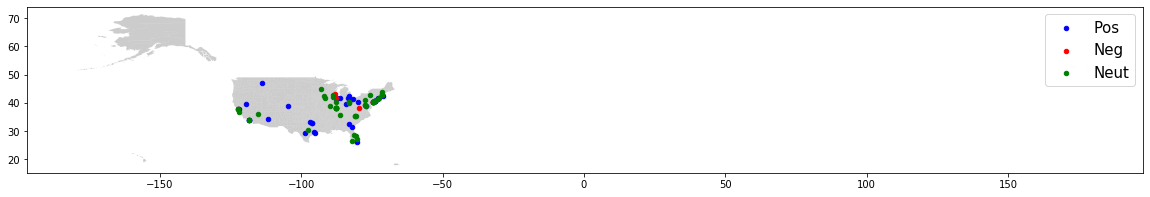

In [45]:
# use shapely by US County
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha=0.4, color ='gray')
geo_df[geo_df['sentiment']=='positive'].plot(ax=ax, markersize = 20, color = "blue", marker ="o", label = "Pos")
geo_df[geo_df['sentiment']=='negative'].plot(ax=ax, markersize = 20, color = "red", marker ="o", label = "Neg")
geo_df[geo_df['sentiment']=='neutral'].plot(ax=ax, markersize = 20, color = "green", marker ="o", label = "Neut")
plt.legend(prop = {'size': 15})

In [46]:
#plot for visualization: based on lat & lon and polarity
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [47]:
street_map = gpd.read_file('C:\Thinkful\Assignments\Final_Project_2\FullYoutubeVideo\cb_2018_us_county_20m\cb_2018_us_county_20m.shp')

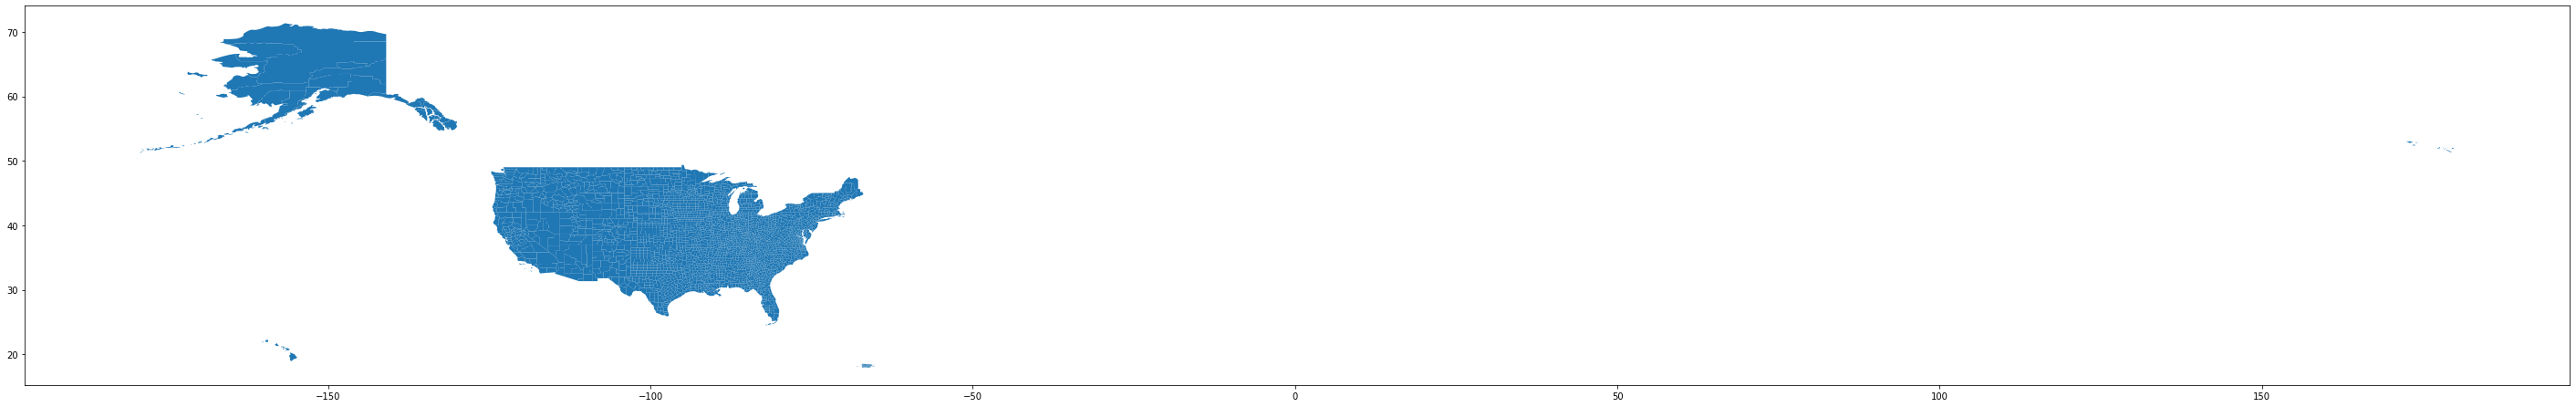

In [48]:
fig,ax = plt.subplots(figsize = (50,50))
street_map.plot(ax=ax)

In [49]:
# now need to overlay the map above with tweet's lat & log

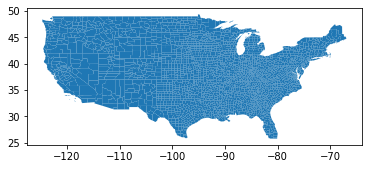

In [50]:
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import rtree

# bounding box for continental US
bbox = [-129.7265625,25.799891182088334,-66.4453125,49.49667452747045]

# Rectangles from bbox
p1 = Point(bbox[0], bbox[3])
p2 = Point(bbox[2], bbox[3])
p3 = Point(bbox[2], bbox[1])
p4 = Point(bbox[0], bbox[1])

# x-coor & y-coor

np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

# define polygon from the points above
bb_polygon = Polygon([np1, np2, np3, np4])

# make a df
df2 = gpd.GeoDataFrame(gpd.GeoSeries(bb_polygon), columns=['geometry'])

# overlay
intersections2 = gpd.overlay(df2, street_map, how='intersection')
#intersections3 = gpd.overlay(geo_df,df2, how='intersection')

plt.ion()
intersections2.plot()

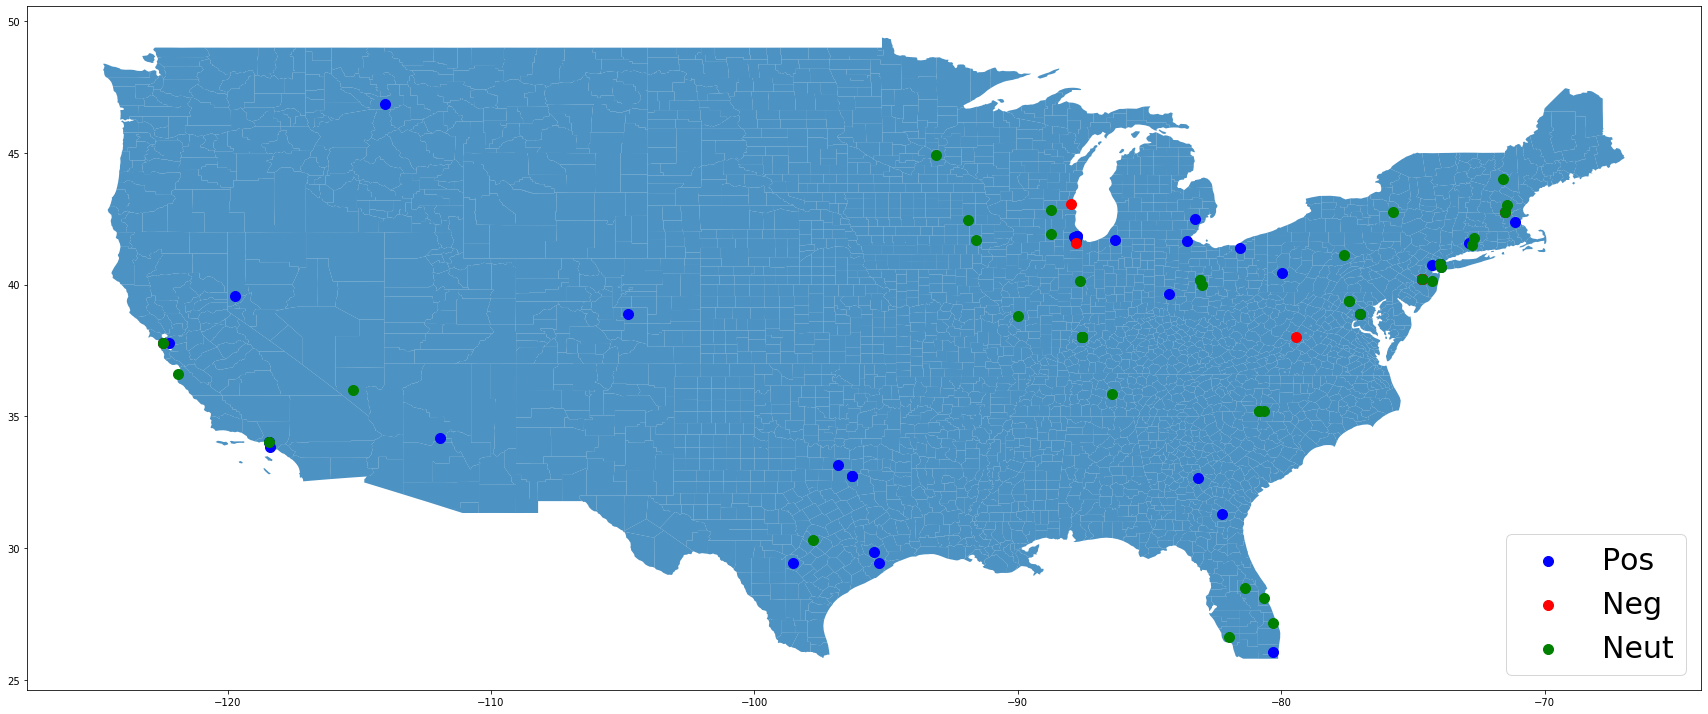

In [153]:
fig,ax = plt.subplots(figsize = (30,30))
intersections2.plot(ax=ax, alpha=0.8)
geo_df[geo_df['sentiment']=='positive'].plot(ax=ax, markersize = 100, color = "blue", marker ="o", label = "Pos")
geo_df[geo_df['sentiment']=='negative'].plot(ax=ax, markersize = 100, color = "red", marker ="o", label = "Neg")
geo_df[geo_df['sentiment']=='neutral'].plot(ax=ax, markersize = 100, color = "green", marker ="o", label = "Neut")
plt.savefig("img/Sentiment_Pete_Buttigieg.png", bbox_inches='tight', pad_inches=2)
plt.legend(prop = {'size': 30}, loc='lower right')